# Top 50 Animated Movies and TV Shows Project

In this project, we will analyse a dataset of the top 50 animated movies and TV shows, acquired by scraping the IMDB website.

We will start by Importing the data and cleaning it, then we will do some exploratory data analysis, and finally, we will answer the following questions:
* Does a higher number of votes mean the movie will have a higher ranking?
* Is there a relationship between the runtime of a movie and its number of votes?
* what is the most succeful genre of movies?

To answer the questions we will need to calculate some descriptive statistics, as well as plot some visualizations.

### 1 - Importing and Cleaning the Data

First, we import the Data and put it into a Pandas DataFrame, then we display the first few lines of the DataFrame.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top = pd.read_csv('Top 50 Animation Movies and TV Shows.csv')

In [3]:
top

,Ranking,Name,Year,Minutes,genre,Rating,Votes
0,1.0,Big Mouth,(2017– ),30 min,"Animation, Comedy, Romance",7.9,"79,301"
1,2.0,The Bad Guys,(2022),100 min,"Animation, Adventure, Comedy",6.8,"37,335"
2,3.0,Chainsaw Man,(2022– ),NaN,"Animation, Action, Adventure",8.8,"10,613"
3,4.0,Rick and Morty,(2013– ),23 min,"Animation, Adventure, Comedy",9.1,"515,315"
4,5.0,Disenchanted,(2022),NaN,"Animation, Adventure, Comedy",NaN,NaN
5,6.0,Zootopia+,(2022– ),NaN,"Animation, Short, Adventure",6.8,"1,232"
6,7.0,Star Wars: Tales of the Jedi,(2022– ),15 min,"Animation, Short, Action",8.4,"15,691"
7,8.0,One Piece Film: Red,(2022),115 min,"Animation, Action, Adventure",6.9,"6,269"
8,9.0,Family Guy,(1999– ),22 min,"Animation, Comedy",8.2,"338,447"
9,10.0,Wendell & Wild,(2022),105 min,"Animation, Adventure, Comedy",6.5,"5,759"


Now, let's check how many columns we have and their names.

In [4]:
top.columns

Index(['Ranking', 'Name', 'Year', 'Minutes', 'genre', 'Rating', 'Votes'], dtype='object')

The naming of the columns is inconsistent, so we will make things easier by changing all letters to lowercase.

In [5]:
top.columns = top.columns.str.lower()

In [6]:
top.columns

Index(['ranking', 'name', 'year', 'minutes', 'genre', 'rating', 'votes'], dtype='object')

Now we check the datatypes.

In [7]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ranking  50 non-null     float64
 1   name     50 non-null     object 
 2   year     50 non-null     object 
 3   minutes  46 non-null     object 
 4   genre    50 non-null     object 
 5   rating   47 non-null     float64
 6   votes    47 non-null     object 
dtypes: float64(2), object(5)
memory usage: 2.9+ KB


The "minutes" column and the "votes" column are in the wrong datatype. They should be integers.

But first, we can see that we have a very small numbers of null values, so we can drop them.

In [8]:
top_clean = top.dropna().copy()
top_clean

,ranking,name,year,minutes,genre,rating,votes
0,1.0,Big Mouth,(2017– ),30 min,"Animation, Comedy, Romance",7.9,"79,301"
1,2.0,The Bad Guys,(2022),100 min,"Animation, Adventure, Comedy",6.8,"37,335"
3,4.0,Rick and Morty,(2013– ),23 min,"Animation, Adventure, Comedy",9.1,"515,315"
6,7.0,Star Wars: Tales of the Jedi,(2022– ),15 min,"Animation, Short, Action",8.4,"15,691"
7,8.0,One Piece Film: Red,(2022),115 min,"Animation, Action, Adventure",6.9,"6,269"
8,9.0,Family Guy,(1999– ),22 min,"Animation, Comedy",8.2,"338,447"
9,10.0,Wendell & Wild,(2022),105 min,"Animation, Adventure, Comedy",6.5,"5,759"
10,11.0,The Simpsons,(1989– ),22 min,"Animation, Comedy",8.7,"406,290"
11,12.0,The Dragon Prince,(2018– ),26 min,"Animation, Action, Adventure",8.3,"23,460"
12,13.0,Attack on Titan,(2013–2023),24 min,"Animation, Action, Adventure",9.0,"369,274"


Now we can change the "minutes" and "votes" columns to the correct dataype.

In [9]:
top_clean['minutes'] = top_clean['minutes'].str.split(' ').str[0]
top_clean.minutes = top_clean.minutes.astype(int)

top_clean['votes'] = top['votes'].str.replace(',', '')
top_clean.votes = top_clean.votes.astype(int)

top_clean

,ranking,name,year,minutes,genre,rating,votes
0,1.0,Big Mouth,(2017– ),30,"Animation, Comedy, Romance",7.9,79301
1,2.0,The Bad Guys,(2022),100,"Animation, Adventure, Comedy",6.8,37335
3,4.0,Rick and Morty,(2013– ),23,"Animation, Adventure, Comedy",9.1,515315
6,7.0,Star Wars: Tales of the Jedi,(2022– ),15,"Animation, Short, Action",8.4,15691
7,8.0,One Piece Film: Red,(2022),115,"Animation, Action, Adventure",6.9,6269
8,9.0,Family Guy,(1999– ),22,"Animation, Comedy",8.2,338447
9,10.0,Wendell & Wild,(2022),105,"Animation, Adventure, Comedy",6.5,5759
10,11.0,The Simpsons,(1989– ),22,"Animation, Comedy",8.7,406290
11,12.0,The Dragon Prince,(2018– ),26,"Animation, Action, Adventure",8.3,23460
12,13.0,Attack on Titan,(2013–2023),24,"Animation, Action, Adventure",9.0,369274


In [10]:
top_clean.dtypes

ranking    float64
name        object
year        object
minutes      int32
genre       object
rating     float64
votes        int32
dtype: object

All is good, we can start with the EDA.

### 2 - Exploratory Data Analysis

We will start with some descriptive statistics.

In [11]:
top_clean.describe(include='all')

,ranking,name,year,minutes,genre,rating,votes
count,45.000000,45,45,45.000000,45,45.000000,4.500000e+01
unique,NaN,45,29,NaN,12,NaN,NaN
top,NaN,Big Mouth,(2022),NaN,"Animation, Action, Adventure",NaN,NaN
freq,NaN,1,7,NaN,16,NaN,NaN
mean,26.844444,NaN,NaN,51.177778,NaN,8.051111,1.686415e+05
std,14.230178,NaN,NaN,38.444345,NaN,1.099922,2.004634e+05
min,1.000000,NaN,NaN,7.000000,NaN,3.200000,3.550000e+02
25%,15.000000,NaN,NaN,23.000000,NaN,7.400000,3.178600e+04
50%,27.000000,NaN,NaN,24.000000,NaN,8.400000,1.013390e+05
75%,39.000000,NaN,NaN,100.000000,NaN,8.700000,2.182330e+05


We will explore the data further.

In [12]:

print('The average runtime of the movies in this dataset is around ' +  str(round(top_clean.minutes.mean())) +' minutes')
print('The minimum runtime of a movie is ' + str(top_clean.minutes.min()) + ' minutes')
print('The maximum runtime of a movie is ' + str(top_clean.minutes.max()) + ' minutes')

The average runtime of the movies in this dataset is around 51 minutes
The minimum runtime of a movie is 7 minutes
The maximum runtime of a movie is 117 minutes


We have a small dataset so we can check the unique values of the columns.

In [13]:
top_clean.minutes.unique()

array([ 30, 100,  23,  15, 115,  22, 105,  26,  24, 117, 106,  20, 110,
        25,  41, 108, 107,  76, 102,  73,  87,   7,  88,  50])

In [14]:
top_clean.minutes.value_counts()

24     9
22     7
23     4
105    3
108    2
15     2
30     1
88     1
7      1
87     1
73     1
102    1
76     1
107    1
110    1
41     1
25     1
100    1
20     1
106    1
117    1
26     1
115    1
50     1
Name: minutes, dtype: int64

Now we plot the distribution of runtime in minutes.

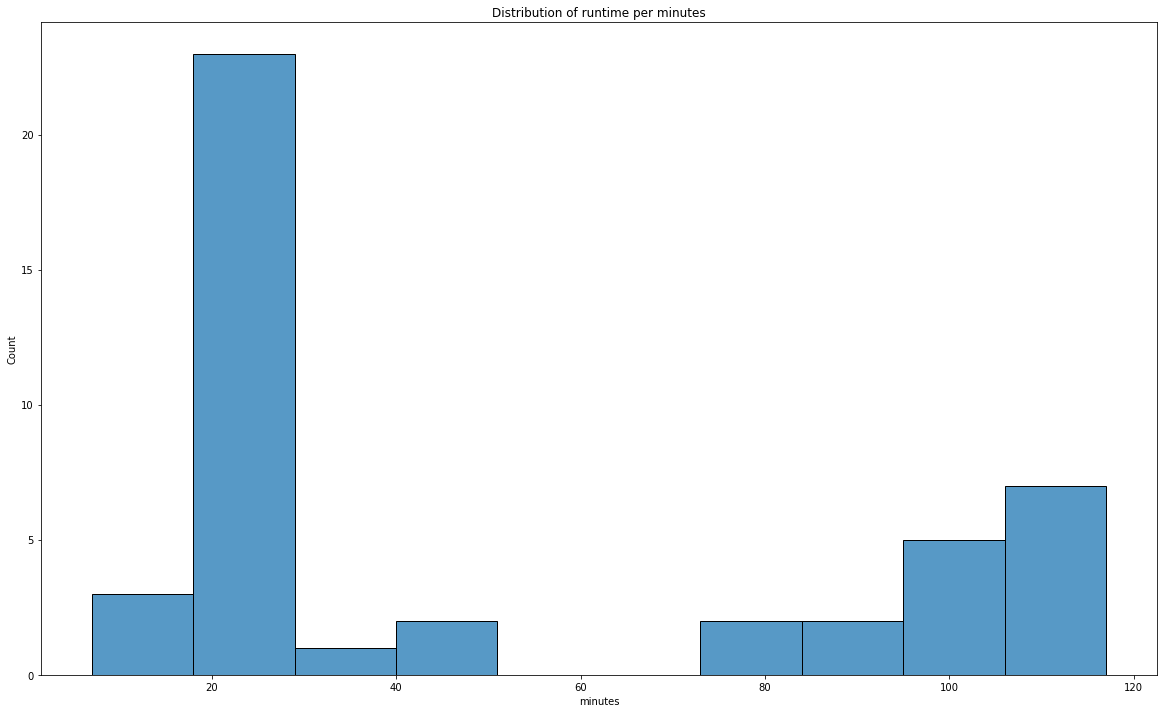

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(20, 12))
sns.histplot(top_clean['minutes'], bins = 10)
plt.title('Distribution of runtime per minutes')
plt.show()
plt.clf()

The dataset contains TV shows (with a runtime <60 minutes) and feature films (with a runtime >60 minutes). As the majority of the data is under 60 minutes, we have more TV shows than feature films represented.

Now let's check what genres we have.

In [16]:
top_clean.genre.unique()

array(['Animation, Comedy, Romance', 'Animation, Adventure, Comedy',
       'Animation, Short, Action', 'Animation, Action, Adventure',
       'Animation, Comedy', 'Animation, Drama, Family',
       'Animation, Comedy, Drama', 'Animation, Family, Fantasy',
       'Animation, Comedy, Family', 'Animation, Action, Comedy',
       'Animation, Family', 'Animation, Adventure, Drama'], dtype=object)

In [17]:
genre_order = top_clean['genre'].value_counts()
genre_order

Animation, Action, Adventure    16
Animation, Adventure, Comedy    10
Animation, Comedy                5
Animation, Comedy, Family        3
Animation, Action, Comedy        3
Animation, Short, Action         2
Animation, Comedy, Romance       1
Animation, Drama, Family         1
Animation, Comedy, Drama         1
Animation, Family, Fantasy       1
Animation, Family                1
Animation, Adventure, Drama      1
Name: genre, dtype: int64

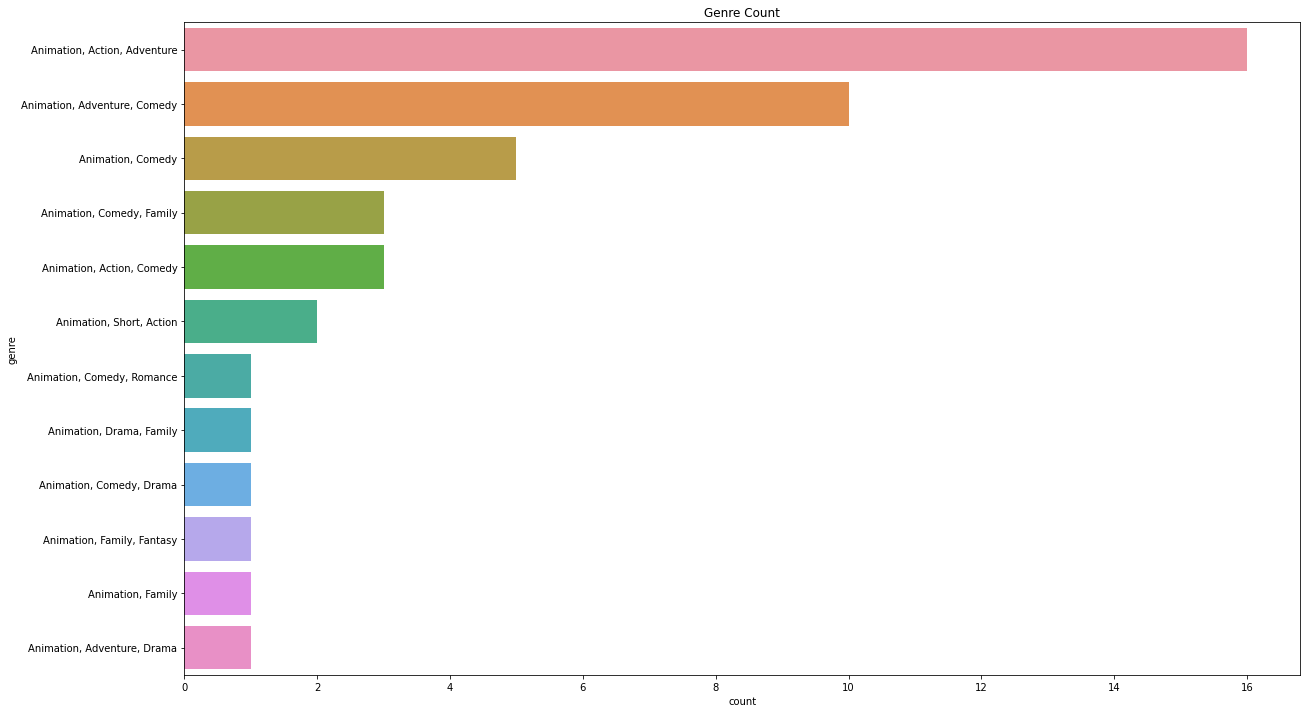

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(20, 12))
sns.countplot(y = top_clean['genre'], order = genre_order.index)
plt.title('Genre Count')
plt.show()
plt.clf()

The "Action, Adventure" category contains the most entries in the top 50 with 16, followed by "Adventure, Comedy"in second place with 10 entries.

In [19]:
top_clean.rating.unique()

array([7.9, 6.8, 9.1, 8.4, 6.9, 8.2, 6.5, 8.7, 8.3, 9. , 8. , 8.9, 9.4,
       6.3, 7.6, 7.4, 7.3, 8.8, 7.1, 7.2, 9.3, 3.2, 8.6, 6.6, 8.5, 9.7])

In [20]:
top_clean['rating'].value_counts()


8.4    6
8.7    4
8.2    3
8.6    3
9.0    3
7.9    2
8.5    2
8.0    2
7.1    2
7.4    2
7.3    1
6.6    1
3.2    1
9.3    1
7.2    1
8.8    1
6.3    1
7.6    1
6.8    1
9.4    1
8.9    1
8.3    1
6.5    1
6.9    1
9.1    1
9.7    1
Name: rating, dtype: int64

In [21]:
rating_order = [7.9, 6.8, 9.1, 8.4, 6.9, 8.2, 6.5, 8.7, 8.3, 9. , 8. , 8.9, 9.4, 6.3, 7.6, 7.4, 7.3, 8.8, 7.1, 7.2, 9.3, 3.2, 8.6, 6.6, 8.5, 9.7]
rating_order.sort()
rating_order

[3.2,
 6.3,
 6.5,
 6.6,
 6.8,
 6.9,
 7.1,
 7.2,
 7.3,
 7.4,
 7.6,
 7.9,
 8.0,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.3,
 9.4,
 9.7]

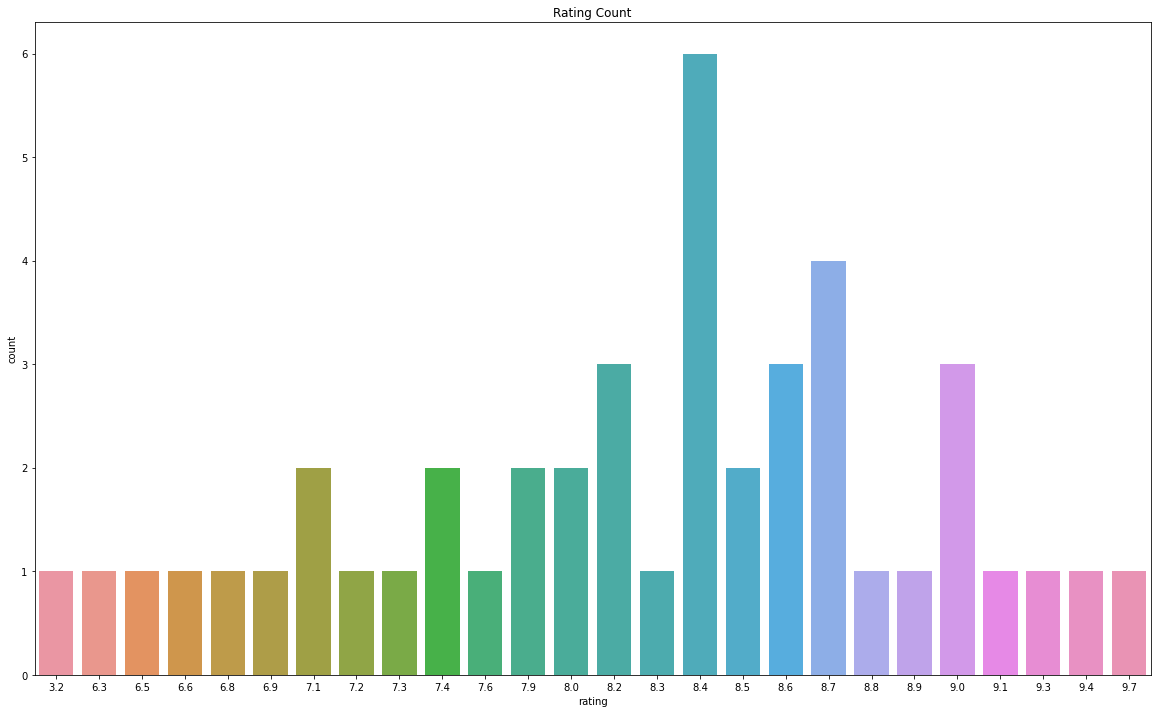

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20, 12))
sns.countplot(x = top_clean['rating'], order = rating_order)
plt.title('Rating Count')
plt.show()
plt.clf()

The rating that occurs most often in the dataset is 8.4, followed by 8.7 in second place.

Now we'll check number of votes.

In [29]:
print('The number of votes for all entries combined is ' +  str(top_clean.votes.sum()) + ' votes.')
print('The average number of votes in this dataset is ' + str(round(top_clean.votes.mean())) + ' votes per entry.')
print('The minimum number of votes for an entry is ' + str(top_clean.votes.min())+ '.')
print('The maximum number of votes for an entry is ' + str(top_clean.votes.max())+ '.')

The number of votes for all entries combined is 7588868 votes.
The average number of votes in this dataset is 168642 votes per entry.
The minimum number of votes for an entry is 355.
The maximum number of votes for an entry is 1052286.


Now that we know more about the dataset, we will move to a deeper analysis and answer the questions.

### 3 - More Analysis

We will start with this question: 
* Does a higher number of votes correlate to a higher ranking? 

In [24]:
top_clean[['name', 'votes']]

,name,votes
0,Big Mouth,79301
1,The Bad Guys,37335
3,Rick and Morty,515315
6,Star Wars: Tales of the Jedi,15691
7,One Piece Film: Red,6269
8,Family Guy,338447
9,Wendell & Wild,5759
10,The Simpsons,406290
11,The Dragon Prince,23460
12,Attack on Titan,369274


No, a higher number of votes does not correlate to a higher ranking.

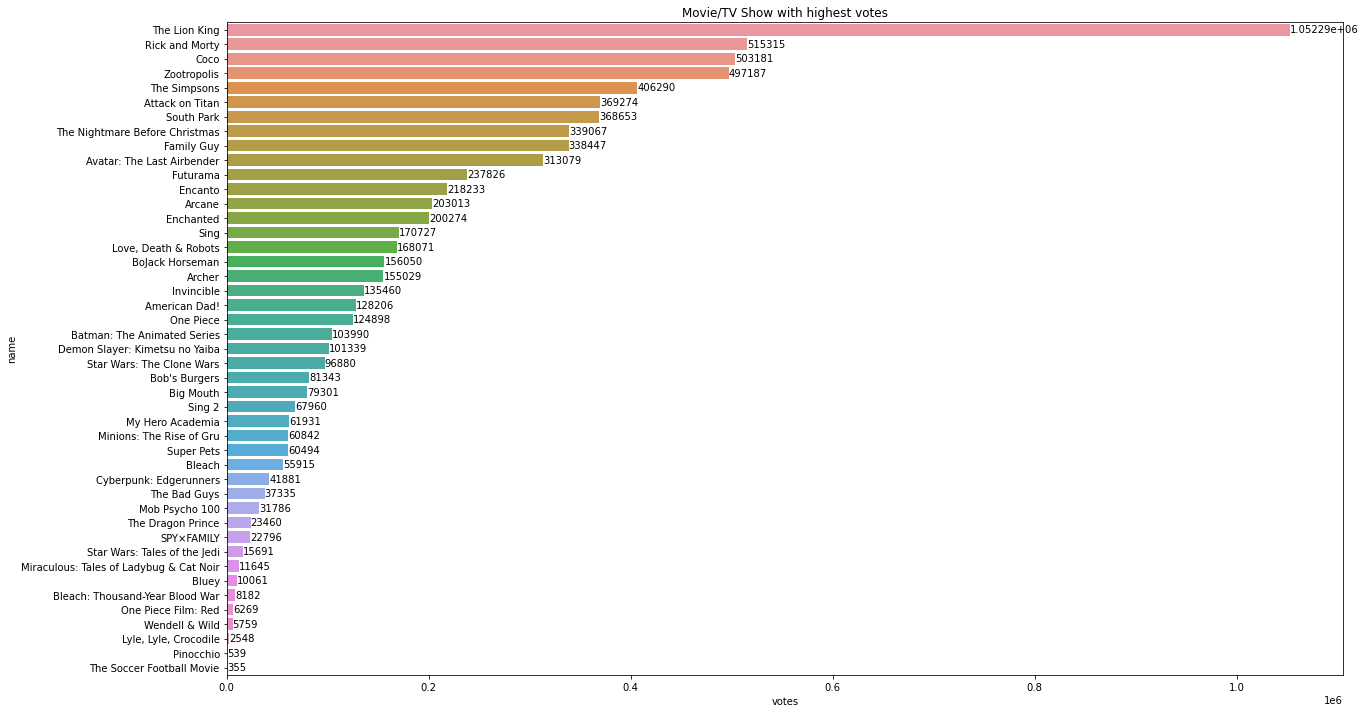

<Figure size 432x288 with 0 Axes>

In [25]:
order = top_clean.groupby('name').mean().sort_values('votes', ascending = False).index

plt.figure(figsize=(20, 12))
ax = sns.barplot(y='name', x='votes', data = top_clean, order=order)
ax.bar_label(ax.containers[0])
plt.title('Movie/TV Show with highest votes')
plt.show()
plt.clf()

We can see that "The Lion King" has the highest number of votes and yet ranks 47 out of the top 50, so the number of votes does not determine the ranking.

Now we answer this question:
* Is there a relationship between the runtime of a movie and its number of votes?

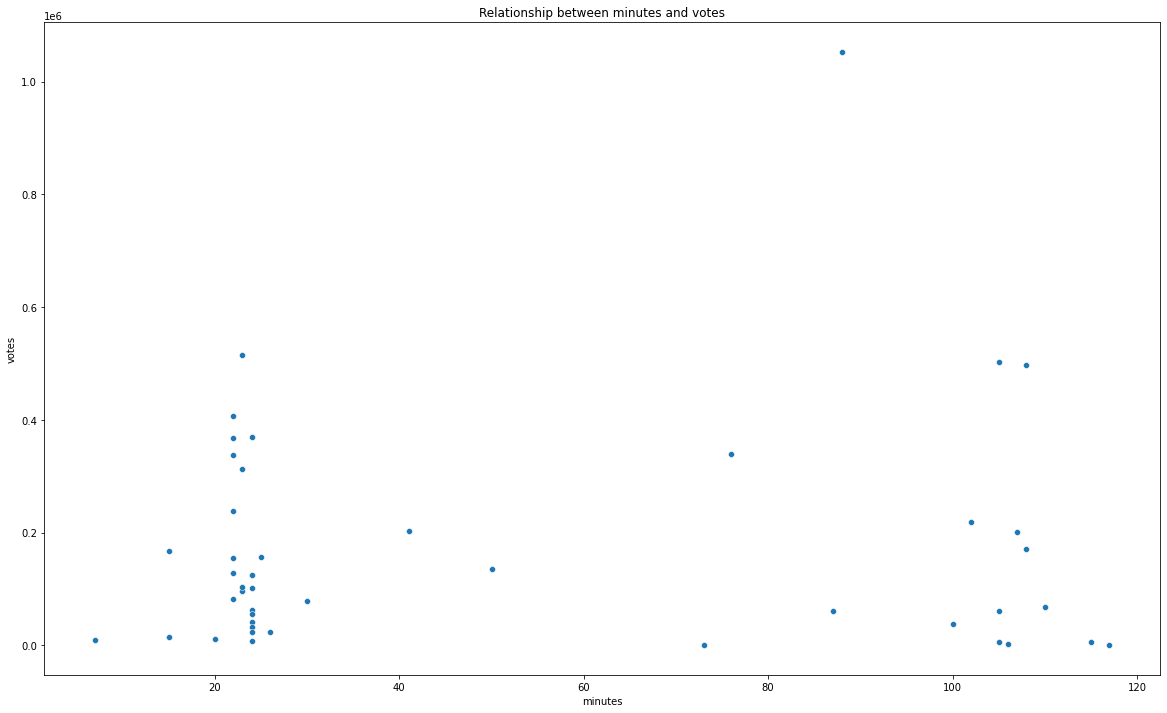

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='minutes', y='votes', data = top_clean)
plt.title('Relationship between minutes and votes')
plt.show()
plt.clf()

From the scatterplot above, we can see that there is no relationship between the number of votes and the runtime of a movie.

And finally, the last question:
* What is the most successful genre of movies?

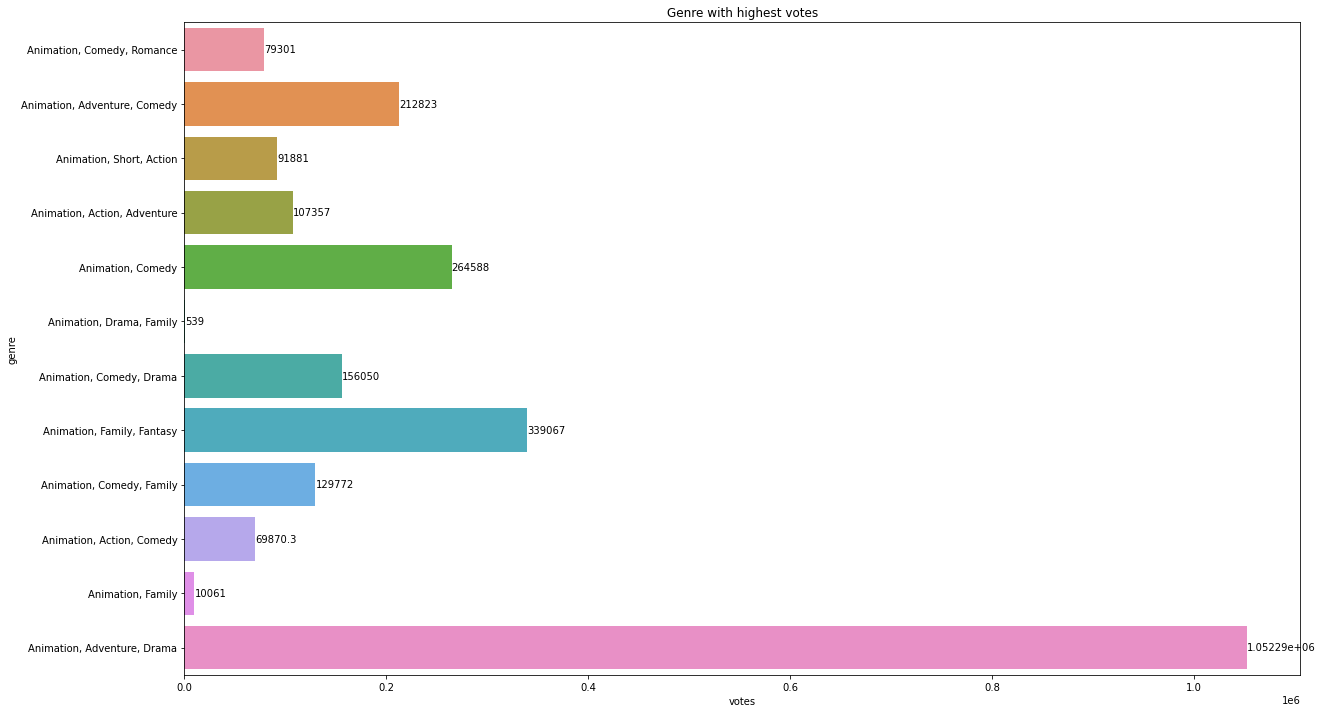

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(20, 12))
ax = sns.barplot(y='genre', x='votes', data = top_clean, ci= None)
ax.bar_label(ax.containers[0])
plt.title('Genre with highest votes')
plt.show()
plt.clf()

From the graph we can see that the "Adventure, Drama" genre has the most votes, but, from an earlier graph, we saw that the "Action, Adventure" genre was the most represented, with 16 entries, despite having a lower number of votes. The highest-rated movie (with a rating of 9.7) is from the "Family" genre, and finally, the highest-ranked movie is from the "Comedy, Romance" genre.

However, keep in mind that due to lack of data, a movie's popularity should be based on highest number of votes (and therefore views), and not necessarily the highest rated or ranked.

To complete the analysis, we'll look at whether there is a relationship between rating and number of votes.

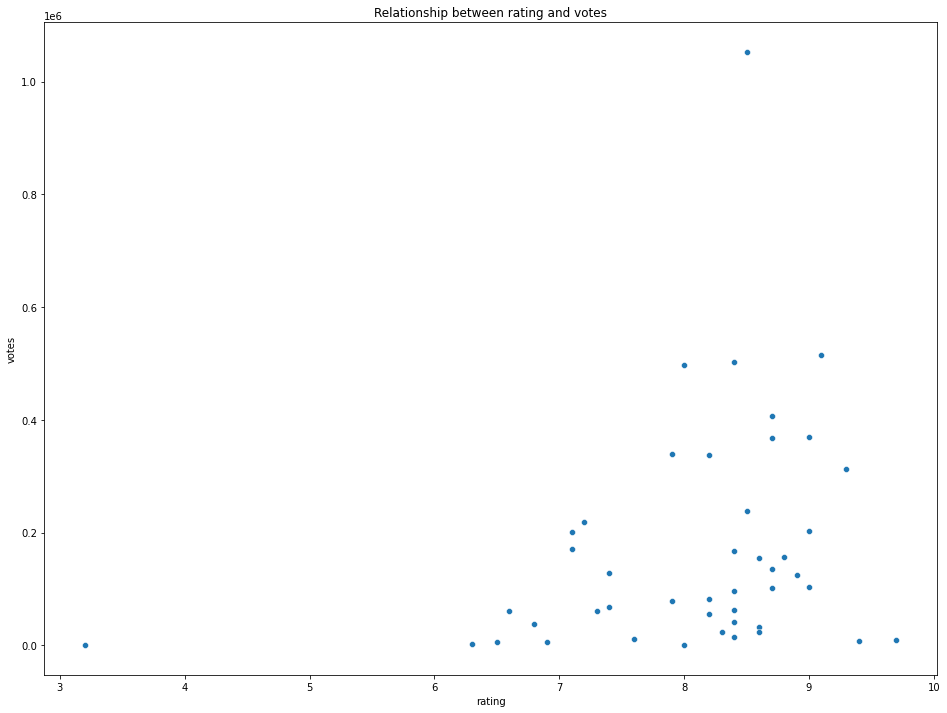

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x='rating', y='votes', data = top_clean)
plt.title('Relationship between rating and votes')
plt.show()
plt.clf()

From this graph, we can conclude that there is no relationship between the rating and the number of votes.

### 4 - Conclusion

From this small dataset, we can learn quite a few things.

The dataset contains more TV shows than movies, creating an imbalance which leads to a less robust analysis.

The "Action, Adventure" has the most entries (16) in the top 50 list.

The average runtime of the movies in this dataset is around 51 minutes, with the minimum runtime of a movie being 7 minutes, and the maximum runtime of a movie being 117 minutes.

The most frequent rating in the dataset is 8.4.

The total number of votes for all the entries combined, is 7,588,868 votes, and the average number of votes per entry in this dataset is 168,642. The minimum number of votes is 355 votes and the maximum number of votes for a single entry is 1,052,286 votes.

The movie "The Lion King" has the highest number of votes, and yet it ranks 47 out of the top 50, so number of votes (and therefore popularity) does not necessarily determine ranking.

There is no correlation between the number of votes and the runtime of a movie.

The most popular genre is "Adventure, Drama", with 1,052,286 votes.

There is no relationship between rating and number of votes.